## Overview

Linear regression allows us to predict some dependent variable - y - based on independent variable x by finding an optimal linear relationship between them. Remember from high school the formula for a line equation:
>y = mx + b
Linear regression algorithms will seek to find optimal values for `m` (the slope of the line)and `b` (The intercept, also known as the bias). This line equation should then allow us to compute a value for `y`,
our dependent variable, so long as we have some input `x`.

![Sample Image](./images/image_2.png)

A few things to note when using linear regression:
- This is best for predicting continuous variables: Something like price, duration, etc. We will unveil other algorithms later that deal with discrete variables.
- As you can probably tell from the graph above, linear regression models can be heavily biased by a few outliers in the data. Your data cleaning will be critical to get the most out of linear regression.

#### Multiple Independet Regression

We will typically leverage multiple independent variables to make our predictions, but the logic
remains. instead of the simple line equation above, if we have n independent variables, we will end
up with an equation that looks like:

> y = b + m1 x1 + m2 x3 + m3 x3 + .... + mn xn

Mathematically this is sound: With only one independent variable, this is the equation of a line, with 2, this becomes the equation of a 2d plane in 3 dimensions, etc.

A linear regression with multiple variables is called a multivariate linear regression. One particularly interesting result in these scenarios is studying the various coefficients. Effectively in an optimized model, what coefficient m tells us is that if all other independent variables remain constant, increasing x by 1 will increase y by m This can help you get a sense of how much each independent variable "contributes" to the value of the dependent variable.

#### Where is the machine learning in this?

How do we come up with an optimal line equation for our model? what is the best value for `m` and `b`? A first step to optimizing m and b is to create an error function (often referred to as **cost function** as well) to assess how good our line `y = mx + b` is.

If you look at the graph above, our regression line does not pass through most of the points, suggesting it's fairly error-prone. To compute the error function we can perform the following steps on each data point in our data set.

1. Compute the difference between your data for the dependent variable, and the prediction from
the regression line
2. Square that value, we want all the differences to be positive
3. Add up all the values you've obtained
4. Divide by the number of data points.

In summary, your **error function** is the average value of `(y - (mx +b))` for all your data points. We want to tweak the values of m and b in order to minimize this function.

This is where the gradient descent algorithm comes into play. Imagine plotting the possible values of `m` and `b` against the error function's value. You'd end up with a shape like this.

![Sample Image](./images/image_3.png)

In the example above, the shape takes the form of a valley of sorts, we basically want to find the point at the bottom of that valley.

Imagine if you were blindfolded on a hill, and asked to come down of it. How would you approach that challenge? Well, you could feel the ground for the slope of the hill, and get a sense for where it's
sloping downwards, then follow that route

This is effectively what gradient descent algorithms do. They pick an initial value for m and b, then compute the error. From then on, they compute the slope (or gradient) at that point, then move towards new values for `m` and `b` that are "downhill" from where they started.

How much m and b change from an iteration to the next is based on the learning rate. This is a very
important parameter, which is worth considering carefully:
1. A low learning rate will lead to a very slow model to train. You will be waiting for a long time for
the optimal regression line.
2. A high learning rate risks missing the optimal point altogether, as exemplified in the picture
below.

![Sample Image](./images/image_4.png)

Gradient descent is a crucial algorithm to be familiar with. Make sure to take time on it today. We have found this link (https://developers.google.com/machine-learning/crash-course/fitter/graph) particularly useful in building up intuition for it.

The readings below will show you implementations of the algorithm, as well as define the most
- common variants of gradient descent:
- Batch gradient descent
- Stochastic gradient descent
- Mini-batch gradient descent

#### Extra Learning Materials

1. [An Introduction to Gradient Descent and Linear Regression](https://spin.atomicobject.com/gradient-descent-linear-regression/)
2. [How to understand Gradient Descent, the most popular ML algorithm](https://www.freecodecamp.org/news/understanding-gradient-descent-the-most-popular-ml-algorithm-a66c0d97307f/)

## Practice

We will now perform our first predictions. Consider the follwoing dataset which tracks various information about grad school applicants, as well as their percentage chance of admission to grad school.

Our aim will be to predict one's chance of getting into grad school. Let's begin by taking a look at the data

In [3]:
## importing python packages
import numpy as np
import pandas as pd

# loading the data
data = pd.read_csv("./data/uni_admission.csv")

# displaying the shape of the data
data.shape

(500, 9)

You should see 500 entries, and 9 columns. Let's also get a description of the data

In [4]:
data.describe()

,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Let's start by focusing on a single variable: the GRE score

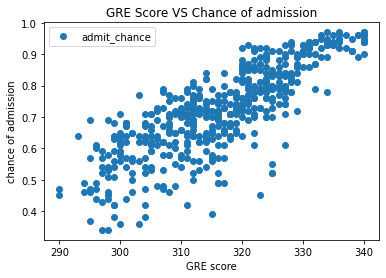

In [5]:
import matplotlib.pyplot as plt

data.plot(x='GRE', y='admit_chance', style='o')
plt.title('GRE Score VS Chance of admission')
plt.xlabel('GRE score')
plt.ylabel('chance of admission')
plt.show()

We can clearly see that there is a relationship between GRE scores and chances of admission. While there are some outliers, we will now build a linear regression model to predict admission chance based on GRE results. First, we set up our train and test datasets

In [6]:
from sklearn.model_selection import train_test_split

X = data['GRE'].values.reshape(-1, 1)
y = data['admit_chance'].values#.reshape(-1, 1)

# Use 20% of the data as test
# The rest will be our training set
GRE_train, GRE_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)

This should be familiar so far, time to actually create the model. We will create a regressor object, and train it using our train data

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(GRE_train, admit_train)

#The fit method will look for our optimal line. More info on this method and others
# at the official documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

-2.5488126924084584
[0.01033718]


How good is our newly fitted model? Let's feed it the data we saved for testing. We will have the model predict chances of admission based on those GRE scores we set aside, then compare that to the actual chances from the original dataset.

In [9]:
admit_predict = regressor.predict(GRE_test)
comparison_frame = pd.DataFrame({'Actual': admit_test.flatten(), 'Predicted': admit_predict.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,100.00000,100.000000
mean,0.70250,0.706884
std,0.13282,0.115189
min,0.39000,0.500657
25%,0.60000,0.614366
50%,0.70500,0.717738
75%,0.80000,0.800435
max,0.96000,0.945156


Our model is not too bad, although you can see that it can be off, as with the min value. Let's visualize it for a better intuition

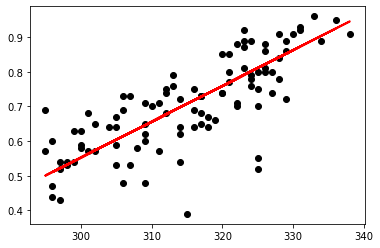

In [10]:
plt.scatter(GRE_test, admit_test, color='black')
plt.plot(GRE_test, admit_predict, color='red', linewidth=2)
plt.show()

We have some outliers, but our line is nicely centered. While visualizations like this are helpful in assessing our line of best fit, sklearn comes with some crucial metrics for linear regressions

In [11]:
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(admit_test, admit_predict))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(admit_test, admit_predict))

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(admit_test, admit_predict)))


Mean Absolute Error: 0.0636984910033071
Mean Squared Error: 0.00726745943092683
Root Mean Squared Error: 0.0852493954871636


How do we make sense of the numbers above? You shoud read through [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) for formal definitions of the metrics above, but bear in mind the following:



*   We will use these metrics (particularly RMSE) to compare models to each other. The lower the value the better.
*   These values are relative to our dependent variable, i.e our dependent variable ranges from 0.39 to 0.96, with a mean of 0.7 and standard deviation of 0.13. This makes an RMSE of 0.085 somewhat acceptable. If our data ranged from 0 to 10, an RMSE of 0.085 would be incredible!

Let's see if we can improve our model by bringing in new independent variables. Let's start by plotting TOEFL scores against admission chance



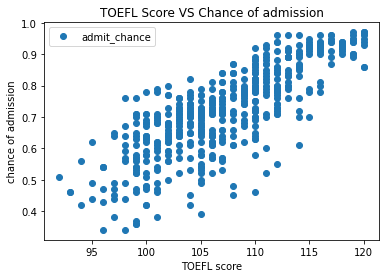

In [12]:
import matplotlib.pyplot as plt

data.plot(x='TOEFL', y='admit_chance', style='o')
plt.title('TOEFL Score VS Chance of admission')
plt.xlabel('TOEFL score')
plt.ylabel('chance of admission')
plt.show()


Once again, we can see that there is a relationship between TOEFL score and chance of admission. Let's perform a multivariate linear regression using both GRE and TOEFL scores as independent variables.

In [13]:
X = data[['GRE', 'TOEFL']].values
y = data['admit_chance'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

It is interesting at this point to check the coefficients used by our model, as they indicate how heavily each independent variable contributes to the dependent variable

In [14]:
regressor.coef_

array([0.00641501, 0.00867603])

In this case, we can see that a single point change in your Toefl score would influence your chances slightly more than a similar 1 point change in GRE scores.
At this point, let's compare our predicted results to the actual data from the test set:

In [16]:
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.058487235725409016
Mean Squared Error: 0.006246893942643222
Root Mean Squared Error: 0.07903729463135249


# Practice 1 - Simple Linear Regression

Predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [17]:
# Importing our libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Importing the CSV dataset using pandas
dataset = pd.read_csv('http://bit.ly/StudentDataset')

In [19]:
# Exploring the dataset
dataset.shape

(25, 2)

In [20]:
# Previewing the dataset
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
# Showing the statistical details of the dataset
#
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


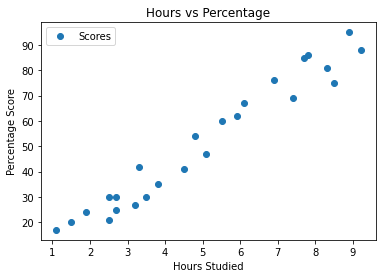

In [22]:
# Plotting to find any relationship between the variables
#
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# We can clearly see that there is a positive linear relation
# between the number of hours studied and percentage of score.

In [23]:
# Preparing the data
# ---
# Dividing the data into "attributes" and "labels".
# Attributes are the independent variables while labels are dependent variables
# whose values are to be predicted. In our dataset we only have two columns.
# We want to predict the percentage score depending upon the hours studied.
# Therefore our attribute set will consist of the "Hours" column,
# and the label will be the "Score" column. To extract the attributes and labels,
# ---
#
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# The attributes are stored in the X variable. We specified "-1" as the range for columns
# since we wanted our attribute set to contain all the columns except the last one,
# which is "Scores". Similarly the y variable contains the labels.
# We specified 1 for the label column since the index for "Scores" column is 1.
# Remember, the column indexes start with 0, with 1 being the second column.

In [24]:
# Splitting the data
# ---
# The next step is to split this data into training and test sets.
# We'll do this by using Scikit-Learn's built-in train_test_split() method
# ---
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# The above script splits 80% of the data to training set while 20% of the data to test set.
# The test_size variable is where we actually specify the proportion of test set.

In [25]:
# Training the Algorithm
# ---
#
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# With Scikit-Learn it is extremely straight forward to implement linear regression models,
# as all you really need to do is import the LinearRegression class, instantiate it,
# and call the fit() method along with our training data.
# This is about as simple as it gets when using a machine learning library to train on your data.

LinearRegression()

In [26]:
# Getting the intercept and slope
# ---
# In the theory section we said that linear regression model basically
# finds the best value for the intercept and slope, which results in a line that best fits the data.
# To see the value of the intercept and slope calculated
# by the linear regression algorithm for our dataset, execute the following code.
# ---
#

# intercept
#
print(regressor.intercept_)

# slope
#
print(regressor.coef_)

# From the output of this cell, it means that for every one unit of change in hours studied,
# the change in the score is about 9.91%. Or in simpler words,
# if a student studies one hour more than they previously studied for an exam,
# they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

2.018160041434662
[9.91065648]


In [27]:
# Making Predictions
# ---
# Now that we have trained our algorithm, it's time to make some predictions.
# To do so, we will use our test data and see how accurately our algorithm predicts the percentage score.
# To make pre-dictions on the test data, execute the following
# ---
#

# The y_pred is a numpy array that contains all the predicted values
# for the input values in the X_test series.
#
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values, execute the following
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

# We will note from the output that though our model is not very precise,
# the predicted percentages are close to the actual ones.

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [28]:
# Evaluating the Algorithm
# ---
# The final step is to evaluate the performance of algorithm.
# This step is particularly important to compare how well different algorithms perform on a particular dataset.
# For regression algorithms, three evaluation metrics are commonly used:
# 1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
# 2. Mean Squared Error (MSE) is the mean of the squared errors.
# 3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.
# ---
# The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.
# Let's find the values for these metrics using our test data. ""
#

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# From the output, we will see that the value of root mean squared error is 4.64,
# which is less than 10% of the mean value of the percentages of all the students i.e. 51.48.
# This means that our algorithm did a decent job.

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


In [ ]:
# Challenge 1
# ---
# The given dataset contains average masses for women as a function
# of their height in a sample of American women of age 30–39.
# Create a simple linear regression model outlining its accuracy.
# ---
# Dataset url = http://bit.ly/HeightsandWeightsDataset
# ---
#
# OUR CODE GOES HERE

In [ ]:
# Challenge 2
# ---
# Create linear regression model to predict salaries given a dataset with salaries data.
# ---
# Dataset url = http://bit.ly/SalariesDataset
# ---
#
# OUR CODE GOES HERE

## 2.0 Multiple Linear Regression

---
Predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a license.

---

In the first example we performed linear regression involving two variables.
Almost all real world problems that you are going to encounter will have more than two variables.
Linear regression involving multiple variables is called "multiple linear regression".
The steps to perform multiple linear regression are almost similar to that of simple linear regression.
The difference lies in the evaluation.
You can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.


In [29]:
# Loading our dataset
dataset = pd.read_csv('http://bit.ly/PetroleumDataset')

In [30]:
# Previewing the dataset
#
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [31]:
# Previewing the statistical details of the dataset
#
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [32]:
# Preparing the Data
# ---
# Dividing the data into attributes and labels as we did previously.
# However, unlike last time, this time around we are going to use column names for creating an attribute set and label.
# ---
#

X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']


In [33]:
# Dividing our data into training and test sets
# ---
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
# Training the Algorithm
# ---
# To train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class
# ---
#
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
# In case of multivariable linear regression, the regression model has to
# find the most optimal coefficients for all the attributes.
# To see what coefficients our regression model has chosen, execute the following
#
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# From the output, this means that for a unit increase in "petrol_tax",
# there is a decrease of 24.19 million gallons in gas consumption.
# Similarly, a unit increase in proportion of population with a drivers license
# results in an increase of 1.324 billion gallons of gas consumption.
# We can see that "Average_income" and "Paved_Highways" have a very little effect on the gas consumption.

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [36]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---

y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [37]:
# Evaluating the Algorithm
# ---
#
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# We can see that the value of root mean squared error is 60.07,
# which is slightly greater than 10% of the mean value of the gas consumption in all states.
# This means that our algorithm was not very accurate but can still make reasonably good predictions.
# There are many factors that may have contributed to this inaccuracy, a few of which are :
# 1. Need more data: Only one year worth of data isn't that much,
#    whereas having multiple years worth could have helped us improve the accuracy quite a bit.
# 2. Bad assumptions: We made the assumption that this data has a linear relationship,
#    but that might not be the case. Visualizing the data may help you determine that.
# 3. Poor features: The features we used may not have had a high enough correlation
#    to the values we were trying to predict.

Mean Absolute Error: 56.82224747896468
Mean Squared Error: 4666.344787588359
Root Mean Squared Error: 68.31064915215167


In [ ]:
# Challenge 1
# ---
# Given the following real estate dataset, create a regression model
# to predict the price of a house.
# ---
# Dataset Source = https://bit.ly/RealEstate_Dataset
# ---
#
# OUR CODE GOES HERE